# Tarea 6 David Alonso Cantú Martínez A00822455

## 1. Hasta  el  momento,  las  variables  independientes  de  los  modelos han  sido  valores  numéricos. Investiguen el método de one hot enconding para que los modelos tomen como entrada valores categóricos. Describan este proceso y adjunten la referencia de su investigación.

One Hot Encoding es un proceso en el que las variables categóricas son convertidas en una forma en la cual si se provee a algoritmos de ML estos puedan hacer un mejor trabajo prediciendo. El problema con las variables categóricas es que el algoritmo puede pensar que si tiene un numero mayor es mejor. En la página que encontré se da el ejemplo con una tabla donde vienen marcas de carros, su valor categórico y un precio, lo que hace el one hot encoding es este valor categórico que viene en la segunda entrada de la tabla, lo cambia a valores de 0 y 1, y en vez de solo tener estas 3 entradas se cambia la tabla a las marcas de carro arriba, y el precio. Es decir si tenía BMW como 1, Nissan como 2, Toyota como 3 y Subaru como 4, se cambian las entradas a BMW, NISSAN, TOYOTA, SUBARO y PRECIO, y en los casos donde las entradas eran BMW, en la columna de BMW se pone un 1, en los que no 0, y así para todos. 

Referencia: 
Vasudev (2017). What is One Hot Encoding? Why and When Do You Have to Use it?. Recuperado de: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

## 2. El archivoTitanic.csv contiene información de los sobrevivientes del barco, la descripción de cada una de las variables es: Survived: Survived (1) or died (0); this is the target variablePclass: Passenger's class (1st, 2nd or 3rd class)Sex: Passenger's sexSibSp: Number of siblings/spouses aboardParch: Number of parents/children aboardFare: FareEmbarked: Port of embarkation

### En  base  a  ese  archivo  generen  un  modelo  de regresión  logística  que  determine  si  un  paciente sobreviviría  el accidente  en  base  al  resto  de  las  variables  dependientes.  Hagan una  predicción  de  si  un pasajero sobreviviría en caso de ser Pclass:1, female, Sibsp: 0, Parch: 0, Fare 7.5 y Embarked: C.

In [1]:
#Import Statements

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [63]:
#Reading the data
titanicDF = pd.read_csv('Titanic.csv')
titanicDF.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [64]:
#One Hot Encoding
titanicDF = pd.get_dummies(titanicDF)
titanicDF.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,0,1,0,0,1
1,1,1,1,0,71.2833,1,0,1,0,0
2,1,3,0,0,7.9250,1,0,0,0,1
3,1,1,1,0,53.1000,1,0,0,0,1
4,0,3,0,0,8.0500,0,1,0,0,1


In [65]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split(titanicDF.drop('Survived', axis=1), titanicDF['Survived'],test_size=0.2, random_state=0)

In [66]:
# Train the model using training data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_train

array([[ 0.81925059, -0.46445234,  1.95926403, ...,  2.12588331,
        -0.31426968, -1.62827579],
       [-0.38096838, -0.46445234, -0.47741019, ..., -0.4703927 ,
        -0.31426968,  0.61414657],
       [-0.38096838,  0.41270964,  0.74092692, ...,  2.12588331,
        -0.31426968, -1.62827579],
       ...,
       [ 0.81925059, -0.46445234, -0.47741019, ..., -0.4703927 ,
         3.18198052, -1.62827579],
       [ 0.81925059,  0.41270964, -0.47741019, ..., -0.4703927 ,
        -0.31426968,  0.61414657],
       [-0.38096838,  0.41270964,  0.74092692, ..., -0.4703927 ,
        -0.31426968,  0.61414657]])

In [67]:
LogReg = LogisticRegression(random_state=0)
LogReg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [68]:
# Pclass  SibSp  Parch  Fare  Sex_female  Sex_male Embarked_C  Embarked_Q  Embarked_S
#    1     0     0      7.5      1          0        1            0              0
dataToPredict = np.array([[1,0,0,7.5,1,0,1,0,0]])
willSurvive = LogReg.predict(dataToPredict)[0]
willSurvive

1

In [69]:
#Obtenemos el score de la regresion logistica
LogReg.score(X_test, y_test)

0.7988826815642458

## 3. The dataset in q1_data.csv is comprised of 1000 instances, each with 2 features (F1 and F2) and a binary label (0 or 1). The two features are related in a particularly interesting way. 

### a) Find out what this relationship looks like by plotting a 2-D graph of the two features. You can use Python’s matplotlib for this task or any other plotting tool of your choice. Include the plot in your answer. 

In [90]:
Q1 = pd.read_csv('q1_data.csv',header=None)
Q1.head()

,0,1,2
0,0.893841,0.448383,0.0
1,-0.763892,0.237633,1.0
2,-0.285130,-0.747463,1.0
3,-0.844328,-0.535827,0.0
4,0.462058,-0.653071,1.0


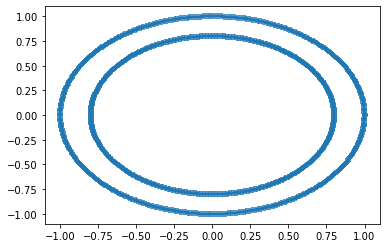

In [91]:
import matplotlib.pyplot as plt
plt.scatter(Q1[0],Q1[1], marker="+")

### b) Using scikit-learn, fit a logistic regression model to the dataset and evaluate its performance (accuracy)  with  10-fold  cross-validation.  You  should  report performance  using  the  accuracy measure, averaged across and all cross-validation runs. Include your source code. 

In [92]:
Q1 = pd.get_dummies(Q1)
Q2 = np.ravel(Q1.drop([0,1], axis=1))
X_train, X_test, y_train, y_test = train_test_split(Q1.drop(2,axis=1),Q2,test_size=0.2, random_state=0)

In [93]:
LogReg = LogisticRegression(random_state=0)
LogReg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [94]:
Score = LogReg.score(X_test, y_test)
print('Puntuación de la prueba:', Score)

Puntuación de la prueba: 0.435


In [95]:
Scores = cross_val_score(LogReg, X_train, y_train, cv=10)
print('Puntuación de Cross-Validation:', Scores)
print('Media de las puntuaciones:', sum(Scores)/len(Scores))

Puntuación de Cross-Validation: [0.5125 0.4625 0.45   0.5    0.45   0.5    0.45   0.525  0.45   0.4625]
Media de las puntuaciones: 0.47625


### c)  Can  you  think  of  a  way  to  improve  the  performance  of  the  model  while  still  employing  the logistic  regression  algorithm?  If  so,  describe  how,  include  your  code  and  present  performance results. (Hint: think about creating new features based on F1 and F2).

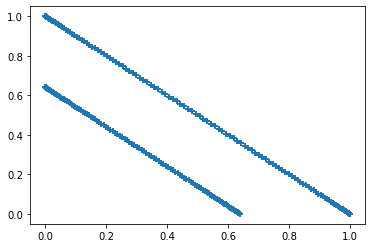

In [96]:
#Se pueden normalizar los datos, en este caso sabemos que los valores son repetidos entonces podemos sacar el cuadrado.

Q1 **= 2
plt.scatter(Q1[0],Q1[1],marker="+")
X_train, X_test, y_train, y_test = train_test_split(Q1.drop(2,axis=1),Q2,test_size=0.2, random_state=0)

In [97]:
LogReg = LogisticRegression(random_state=0)
LogReg.fit(X_train,y_train)
Score = LogReg.score(X_test, y_test)
print('Puntuación de la prueba', Score)
Scores = cross_val_score(LogReg, X_train, y_train, cv=10)
print('Puntuación de Cross-Validation:', Scores)
print('Media de las puntuaciones:', sum(Scores)/len(Scores))

Puntuación de la prueba 1.0
Puntuación de Cross-Validation: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Media de las puntuaciones: 1.0
